In [1]:
!pip install matplotlib seaborn pandas scipy



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("asthma_influenza_data_processed.csv")
data.head()

,DUPERSID,SEX,DOBYY,AGEDIAG,MARRY31X,RACEV2X,REGION42,TOTEXP19,ICD10CDX,ADAPPT42,...,ASATAK31,ASDALY31,ASSTIL31,ASACUT31,ASPREV31,ASPKFL31,MCDOC19,ADHECR42,Current_Age,Flu_shot_taken
0,2320006102,1,1998,0.0,5.0,1,3.0,269,45,0,...,2.0,1.0,2.0,2,2,2,2,3.586052,26,2
1,2320024104,1,2013,2.0,6.0,1,2.0,5258,45,5,...,2.0,1.0,1.0,1,2,2,1,3.586052,11,2
2,2320035103,2,1967,5.0,2.0,1,1.0,30758,45,5,...,1.0,1.0,1.0,1,1,2,1,3.586052,56,2
3,2320035104,1,2018,0.0,6.0,12,1.0,152,45,5,...,2.0,1.0,1.0,1,1,2,1,3.586052,6,2
4,2320043101,2,1958,43.0,1.0,1,2.0,7824,45,3,...,2.0,2.0,1.0,2,1,1,2,10.000000,66,2


In [4]:
data.shape

(2667, 21)

In [5]:
data.columns

Index(['DUPERSID', 'SEX', 'DOBYY', 'AGEDIAG', 'MARRY31X', 'RACEV2X',
       'REGION42', 'TOTEXP19', 'ICD10CDX', 'ADAPPT42', 'ADRISK42', 'ASATAK31',
       'ASDALY31', 'ASSTIL31', 'ASACUT31', 'ASPREV31', 'ASPKFL31', 'MCDOC19',
       'ADHECR42', 'Current_Age', 'Flu_shot_taken'],
      dtype='object')

In [6]:
data["ADHECR42"] = data["ADHECR42"].round().astype(int)

In [7]:
data["ADHECR42"].value_counts()

ADHECR42
4     1295
10     403
8      332
9      269
7      170
5       85
6       75
2       16
3       12
0        7
1        3
Name: count, dtype: int64

In [8]:
data["ICD10CDX"].value_counts()

ICD10CDX
45    1755
11     888
9       24
Name: count, dtype: int64

In [9]:
ASTHMA  = data[data["ICD10CDX"] == 45 ].sample(n=100, random_state=42)
INFLUENZA = data[(data["ICD10CDX"] == 11) | (data["ICD10CDX"] == 9)].sample(n=100, random_state=42)

sample_df = pd.concat([ASTHMA, INFLUENZA])

print(sample_df.head())
print(sample_df["ICD10CDX"].value_counts())


        DUPERSID  SEX  DOBYY  AGEDIAG  MARRY31X  RACEV2X  REGION42  TOTEXP19  \
322   2323589101    2   1949     40.0       2.0        1       3.0      8474   
408   2324595102    1   1957     21.0       1.0        1       2.0     57504   
405   2324534101    2   1980      5.0       5.0        2       3.0     44065   
462   2325214101    1   1942     60.0       5.0        1       1.0     18057   
1137  2462551101    2   1991     18.0       1.0        1       4.0        83   

      ICD10CDX  ADAPPT42  ...  ASATAK31  ASDALY31  ASSTIL31  ASACUT31  \
322         45         5  ...       1.0       1.0       1.0         2   
408         45         6  ...       1.0       1.0       1.0         1   
405         45         0  ...       1.0       1.0       1.0         1   
462         45         2  ...       1.0       1.0       1.0         1   
1137        45         0  ...       1.0       1.0       1.0         1   

      ASPREV31  ASPKFL31  MCDOC19  ADHECR42  Current_Age  Flu_shot_taken  
322  

# Comparison of Asthma and Influenza Cases Across Racial Categories

In [11]:
print(data['RACEV2X'].value_counts())


RACEV2X
1     1912
2      467
12     132
10      47
4       41
3       32
6       25
5       11
Name: count, dtype: int64


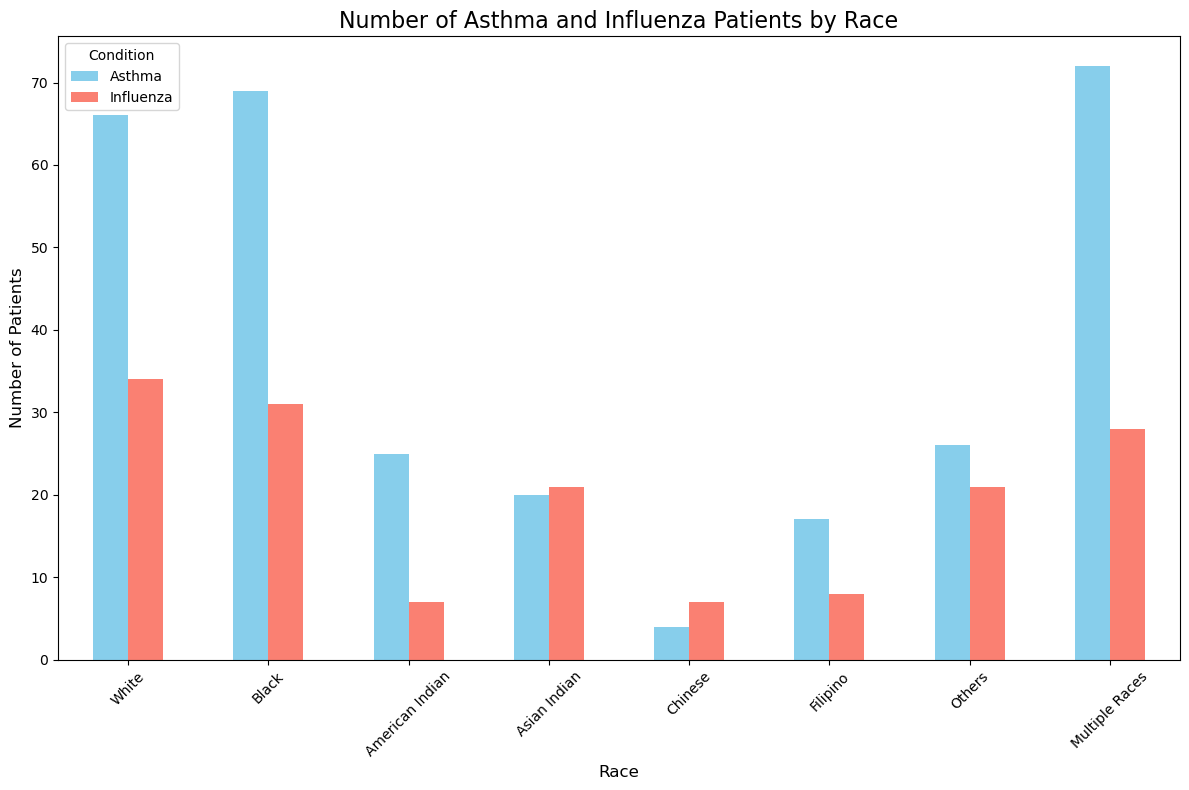

In [12]:
race_mapping = {
    1: "White",
    2: "Black",
    3: "American Indian",
    4: "Asian Indian",
    5: "Chinese",
    6: "Filipino",
    10: "Others",
    12: "Multiple Races"
}

race_sampled_data = (
    data.groupby('RACEV2X', group_keys=False)
    .apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))
)

asthma_count = race_sampled_data[race_sampled_data["ICD10CDX"] == 45 ].groupby('RACEV2X').size()
influenza_count = race_sampled_data[(race_sampled_data["ICD10CDX"] == 11) | (race_sampled_data["ICD10CDX"] == 9)].groupby('RACEV2X').size()


chart_data = pd.DataFrame({
    'Asthma': asthma_count,
    'Influenza': influenza_count
}).fillna(0)  # Replace NaN with 0 for races with no cases

chart_data.index = chart_data.index.map(race_mapping)


if not chart_data.empty:
    chart_data.plot(kind='bar', figsize=(12, 8), color=["skyblue", "salmon"])
    plt.title('Number of Asthma and Influenza Patients by Race', fontsize=16)
    plt.xlabel('Race', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title='Condition', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting. Please check the input conditions.")

# Frequency of males and females in INFLUENZA and ASTHMA group

In [14]:
asthma_gender_counts = ASTHMA['SEX'].value_counts()

influenza_gender_counts = INFLUENZA['SEX'].value_counts()

gender_counts = pd.DataFrame({
    'ASTHMA': asthma_gender_counts,
    'INFLUENZA': influenza_gender_counts
}).reset_index().rename(columns={'index': 'SEX'})

gender_counts['SEX'] = gender_counts['SEX'].map({1: 'Male', 2: 'Female'})

print(gender_counts)


      SEX  ASTHMA  INFLUENZA
0  Female      63         62
1    Male      37         38


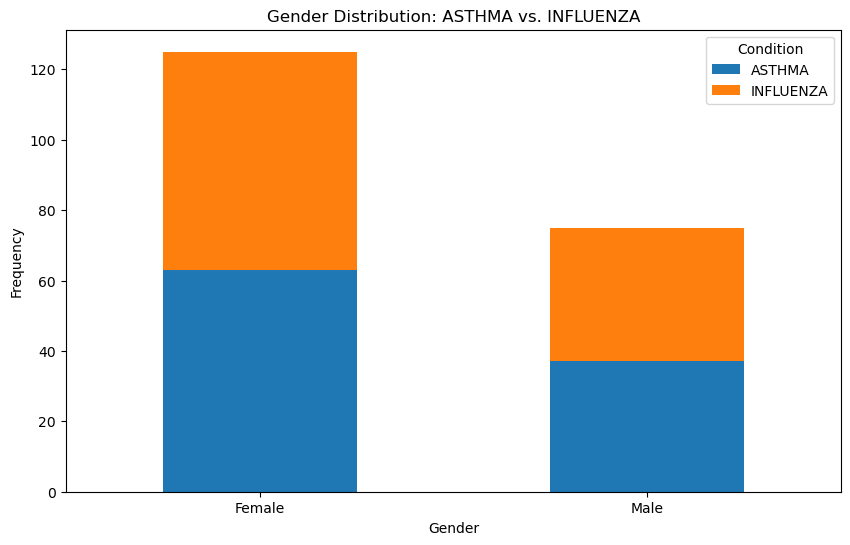

In [15]:

gender_counts.set_index('SEX', inplace=True)

gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Gender Distribution: ASTHMA vs. INFLUENZA')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Condition')
plt.xticks(rotation=0)

plt.show()


# Calculate mean and median ages at diagnosis for ASTHMA and INFLUENZA group


In [17]:
asthma_mean_age = ASTHMA['AGEDIAG'].mean()
asthma_median_age = ASTHMA['AGEDIAG'].median()

influenza_mean_age = INFLUENZA['AGEDIAG'].mean()
influenza_median_age = INFLUENZA['AGEDIAG'].median()

print(f"ASTHMA Mean Age at Diagnosis: {asthma_mean_age}")
print(f"ASTHMA Median Age at Diagnosis: {asthma_median_age}")
print(f"INFLUENZA Mean Age at Diagnosis: {influenza_mean_age}")
print(f"INFLUENZA Median Age at Diagnosis: {influenza_median_age}")


ASTHMA Mean Age at Diagnosis: 23.94
ASTHMA Median Age at Diagnosis: 16.5
INFLUENZA Mean Age at Diagnosis: 11.98
INFLUENZA Median Age at Diagnosis: 3.0


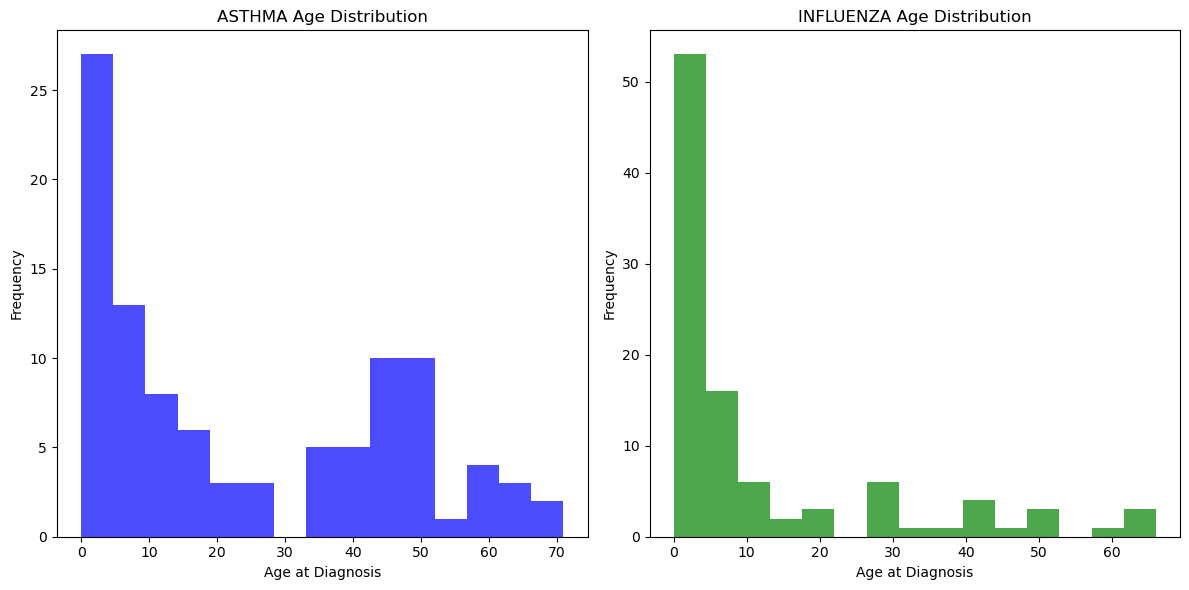

In [18]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(ASTHMA['AGEDIAG'], bins=15, color='blue', alpha=0.7, label='ASTHMA')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.title('ASTHMA Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(INFLUENZA['AGEDIAG'], bins=15, color='green', alpha=0.7, label='INFLUENZA')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.title('INFLUENZA Age Distribution')

plt.tight_layout()
plt.show()


# Frequency distribution of racial groups in ASTHMA and INFLUENZA group


In [20]:
asthma_race_counts = ASTHMA['RACEV2X'].value_counts().sort_index()

influenza_race_counts = INFLUENZA['RACEV2X'].value_counts().sort_index()

race_counts = pd.DataFrame({
    'ASTHMA': asthma_race_counts,
    'INFLUENZA': influenza_race_counts
}).reset_index().rename(columns={'index': 'RACEV2X'})

print(race_counts)


   RACEV2X  ASTHMA  INFLUENZA
0        1    69.0         70
1        2    19.0         15
2        3     2.0          1
3        4     2.0          2
4        5     1.0          2
5        6     1.0          2
6       10     NaN          4
7       12     6.0          4


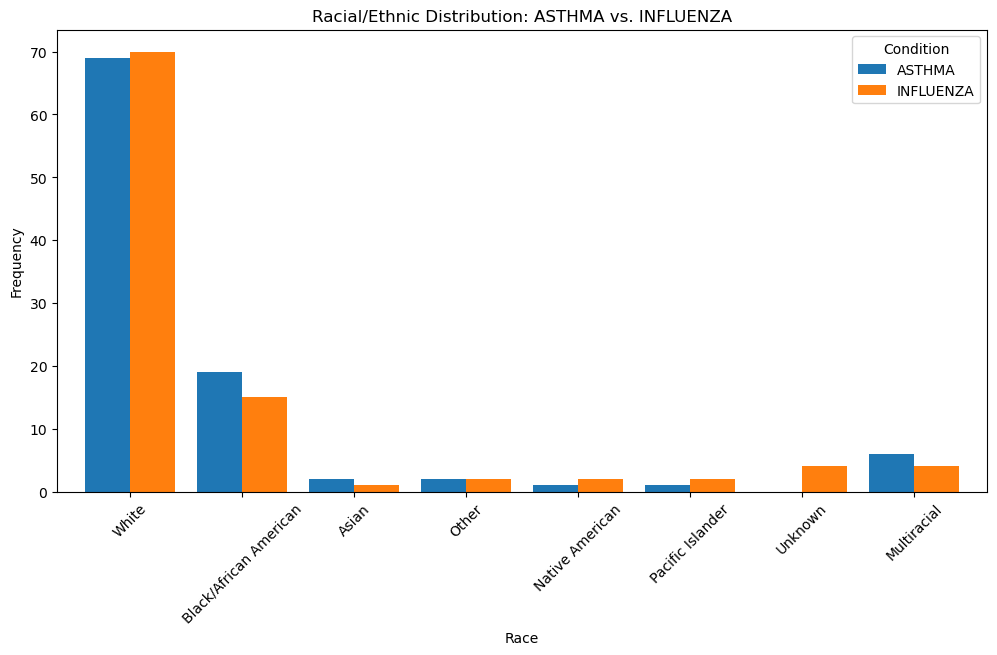

In [21]:
import matplotlib.pyplot as plt

race_labels = {
    1: 'White',
    2: 'Black/African American',
    3: 'Asian',
    4: 'Other',
    5: 'Native American',
    6: 'Pacific Islander',
    10: 'Unknown',
    12: 'Multiracial'
}
race_counts['RACEV2X'] = race_counts['RACEV2X'].map(race_labels)

race_counts.fillna(0, inplace=True)

race_counts.plot(x='RACEV2X', kind='bar', figsize=(12, 6), width=0.8)

plt.title('Racial/Ethnic Distribution: ASTHMA vs. INFLUENZA')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend(title='Condition')
plt.xticks(rotation=45)

plt.show()


# Geographic Distribution: ASTHMA vs. INFLUENZA

In [23]:
asthma_region_counts = ASTHMA['REGION42'].value_counts().sort_index()

influenza_region_counts = INFLUENZA['REGION42'].value_counts().sort_index()

region_counts = pd.DataFrame({
    'ASTHMA': asthma_region_counts,
    'INFLUENZA': influenza_region_counts
}).reset_index().rename(columns={'index': 'REGION42'})

print(region_counts)


   REGION42  ASTHMA  INFLUENZA
0       1.0      22         14
1       2.0      24         16
2       3.0      36         49
3       4.0      18         21


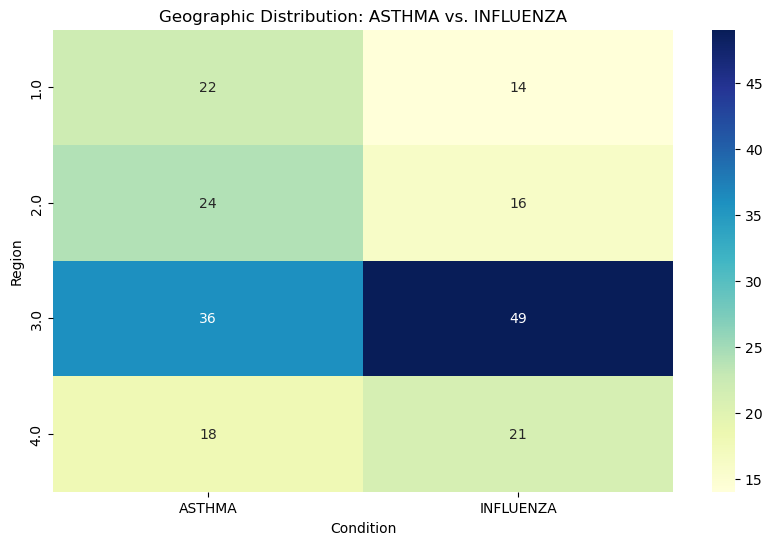

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

region_counts = region_counts.melt(id_vars="REGION42", var_name="Condition", value_name="Count")

plt.figure(figsize=(10, 6))
heatmap_data = region_counts.pivot(index="REGION42", columns="Condition", values="Count")
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Geographic Distribution: ASTHMA vs. INFLUENZA')
plt.xlabel('Condition')
plt.ylabel('Region')

plt.show()


# Number of Medical Appointments (ADAPPT42): ASTHMA vs. INFLUENZA

In [26]:
asthma_mean_appointments = ASTHMA['ADAPPT42'].mean()

influenza_mean_appointments = INFLUENZA['ADAPPT42'].mean()

print(f"ASTHMA Mean Number of Appointments: {asthma_mean_appointments}")
print(f"INFLUENZA Mean Number of Appointments: {influenza_mean_appointments}")


ASTHMA Mean Number of Appointments: 3.74
INFLUENZA Mean Number of Appointments: 3.94


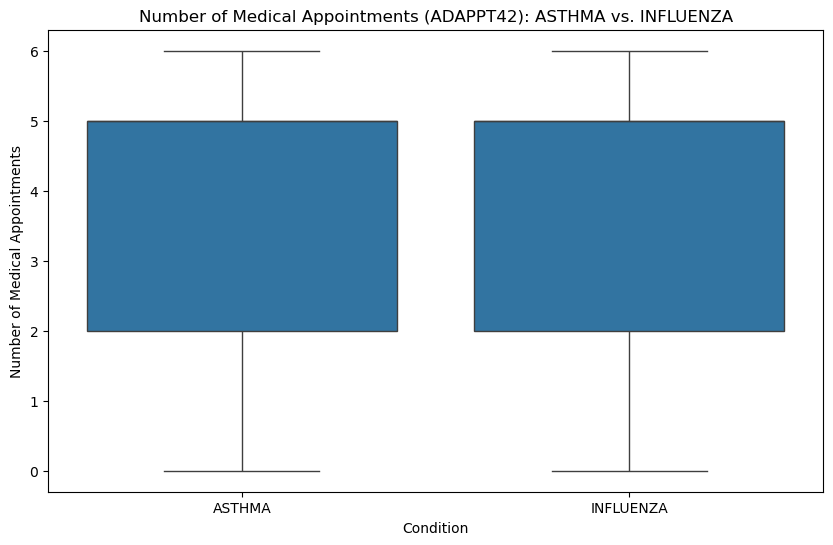

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

ASTHMA['Condition'] = 'ASTHMA'
INFLUENZA['Condition'] = 'INFLUENZA'

combined_data = pd.concat([ASTHMA, INFLUENZA])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='ADAPPT42', data=combined_data)

plt.title('Number of Medical Appointments (ADAPPT42): ASTHMA vs. INFLUENZA')
plt.xlabel('Condition')
plt.ylabel('Number of Medical Appointments')

plt.show()


# Frequency of Respondents Who Received Flu Shots

Frequency of respondents who received flu shots:
Flu_shot_taken
2    94
1     6
Name: count, dtype: int64
Cross-tabulation of flu shot with age:
Current_Age     5   6   7   8   9   10  11  12  13  14  ...  68  69  71  72  \
Flu_shot_taken                                          ...                   
1                0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
2                1   3   2   2   4   6   7   3   3   1  ...   2   1   1   2   

Current_Age     73  74  75  78  80  81  
Flu_shot_taken                          
1                1   0   0   1   0   1  
2                1   1   2   1   1   2  

[2 rows x 54 columns]
Cross-tabulation of flu shot with region:
REGION42        1.0  2.0  3.0  4.0
Flu_shot_taken                    
1                 2    0    3    1
2                12   16   46   20
Cross-tabulation of flu shot with healthcare expenditure:
TOTEXP19        14      130     246     250     277     288     435     \
Flu_shot_taken                       

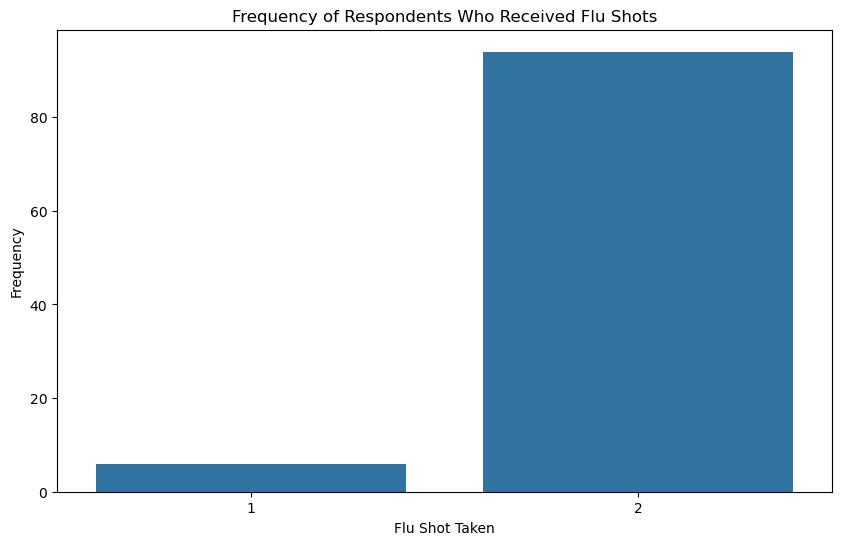

In [29]:
flu_shot_taken_count = INFLUENZA['Flu_shot_taken'].value_counts()
print("Frequency of respondents who received flu shots:")
print(flu_shot_taken_count)

cross_tab_age = pd.crosstab(INFLUENZA['Flu_shot_taken'], INFLUENZA['Current_Age'])
cross_tab_region = pd.crosstab(INFLUENZA['Flu_shot_taken'], INFLUENZA['REGION42'])
cross_tab_expenditure = pd.crosstab(INFLUENZA['Flu_shot_taken'], INFLUENZA['TOTEXP19'])

print("Cross-tabulation of flu shot with age:")
print(cross_tab_age)

print("Cross-tabulation of flu shot with region:")
print(cross_tab_region)

print("Cross-tabulation of flu shot with healthcare expenditure:")
print(cross_tab_expenditure)

plt.figure(figsize=(10, 6))
sns.barplot(x=flu_shot_taken_count.index, y=flu_shot_taken_count.values)
plt.title('Frequency of Respondents Who Received Flu Shots')
plt.xlabel('Flu Shot Taken')
plt.ylabel('Frequency')
plt.show()


In [30]:
influenza_mean_expenditure = INFLUENZA['TOTEXP19'].mean()

influenza_mean_appointments = INFLUENZA['ADAPPT42'].mean()

print(f"INFLUENZA Mean Total Expenditure (TOTEXP19): {influenza_mean_expenditure}")
print(f"INFLUENZA Mean Number of Appointments (ADAPPT42): {influenza_mean_appointments}")


INFLUENZA Mean Total Expenditure (TOTEXP19): 9843.76
INFLUENZA Mean Number of Appointments (ADAPPT42): 3.94


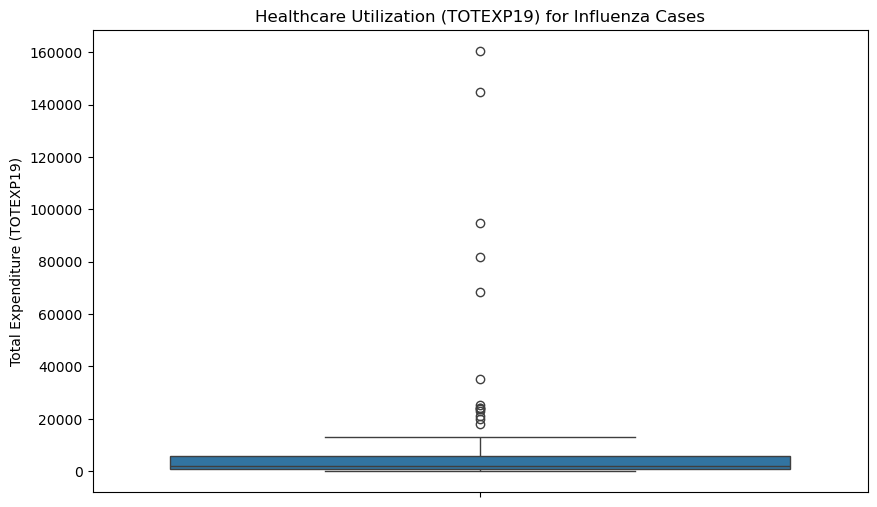

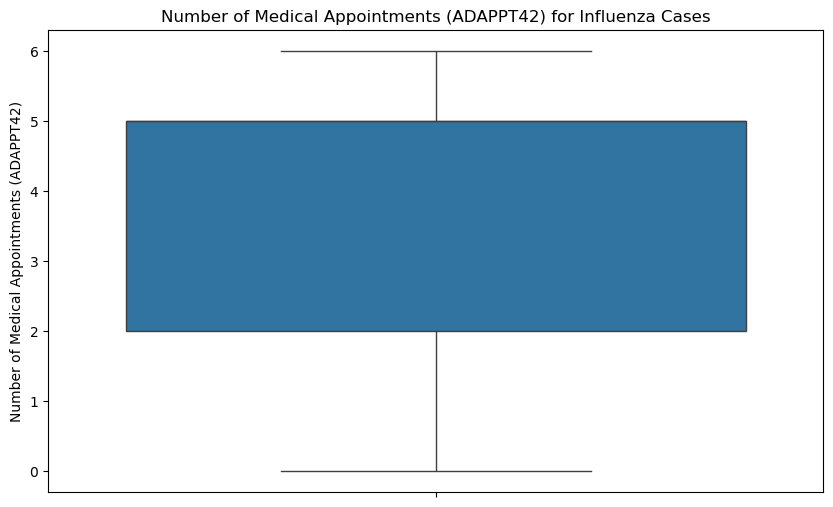

In [31]:


plt.figure(figsize=(10, 6))
sns.boxplot(y='TOTEXP19', data=INFLUENZA)
plt.title('Healthcare Utilization (TOTEXP19) for Influenza Cases')
plt.ylabel('Total Expenditure (TOTEXP19)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='ADAPPT42', data=INFLUENZA)
plt.title('Number of Medical Appointments (ADAPPT42) for Influenza Cases')
plt.ylabel('Number of Medical Appointments (ADAPPT42)')
plt.show()


In [32]:
ASTHMA_stats = ASTHMA['TOTEXP19'].describe()
ASTHMA_IQR = ASTHMA['TOTEXP19'].quantile(0.75) - ASTHMA['TOTEXP19'].quantile(0.25)

INFLUENZA_stats = INFLUENZA['TOTEXP19'].describe()
INFLUENZA_IQR = INFLUENZA['TOTEXP19'].quantile(0.75) - INFLUENZA['TOTEXP19'].quantile(0.25)

print("Statistics for patients with ASTHMA:")
print(f"Mean: {ASTHMA_stats['mean']}")
print(f"Median: {ASTHMA['TOTEXP19'].median()}")
print(f"Min: {ASTHMA_stats['min']}")
print(f"Max: {ASTHMA_stats['max']}")
print(f"IQR: {ASTHMA_IQR}")

print("\nStatistics for patients with INFLUENZA:")
print(f"Mean: {INFLUENZA_stats['mean']}")
print(f"Median: {INFLUENZA['TOTEXP19'].median()}")
print(f"Min: {INFLUENZA_stats['min']}")
print(f"Max: {INFLUENZA_stats['max']}")
print(f"IQR: {INFLUENZA_IQR}")


Statistics for patients with ASTHMA:
Mean: 13628.44
Median: 5983.0
Min: 72.0
Max: 106763.0
IQR: 13542.0

Statistics for patients with INFLUENZA:
Mean: 9843.76
Median: 1962.5
Min: 14.0
Max: 160421.0
IQR: 5056.0


### ASTHMA GROUP:

•	By having a higher mean and median, this indicates that the majority of the patients within this group are consistently spending high on medical costs, showing that their treatments are ongoing.

•	With the expenditure range smaller and the IQR, a majority of the expenditure is identical among the patients to reflect reasonable and stable costs within the group.


### INFLUENZA Group:


•	The largest range and greater maximum expense indicates that many patients would have low expense, although there are the cases who may have extraordinarily high expense. This suggests variabilities in the severity of the flu and duration in the flu cases.

•	 The lower mean and median expenditures suggest that, on average, treatments for influenza may not be as expensive as treatments for asthma, but the presence of outliers increases overall variability.



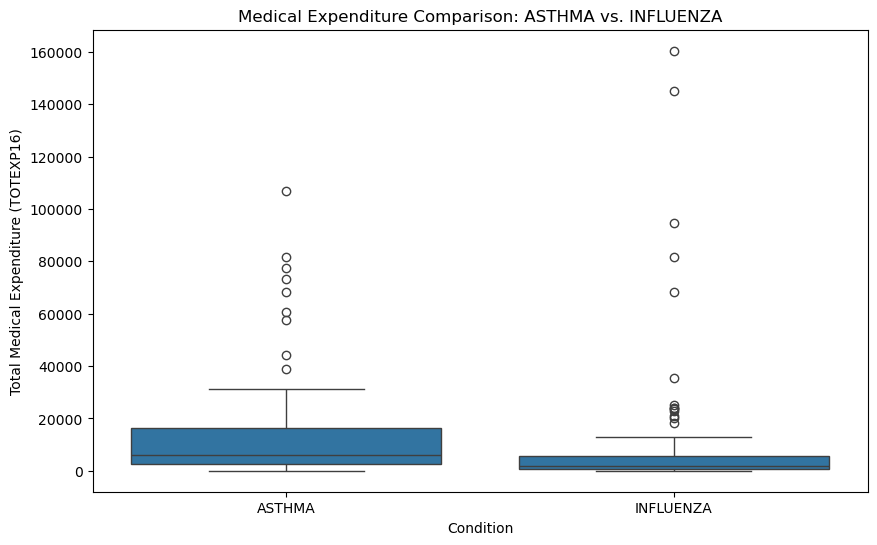

In [34]:


ASTHMA['Condition'] = 'ASTHMA'
INFLUENZA['Condition'] = 'INFLUENZA'

combined_data = pd.concat([ASTHMA, INFLUENZA])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='TOTEXP19', data=combined_data)

plt.title('Medical Expenditure Comparison: ASTHMA vs. INFLUENZA')
plt.xlabel('Condition')
plt.ylabel('Total Medical Expenditure (TOTEXP16)')

plt.show()


The ASTHMA group likely has higher median medical expenditures and a wider range of expenses, indicating more substantial and varied treatment costs.

The INFLUENZA group might have lower median expenditures but more variability in costs, as indicated by the presence of outliers.


ASTHMA Group Skewness: 2.5687367026148378
ASTHMA Group Kurtosis: 6.844051774754542
INFLUENZA Group Skewness: 4.36949023477
INFLUENZA Group Kurtosis: 20.00763540410016


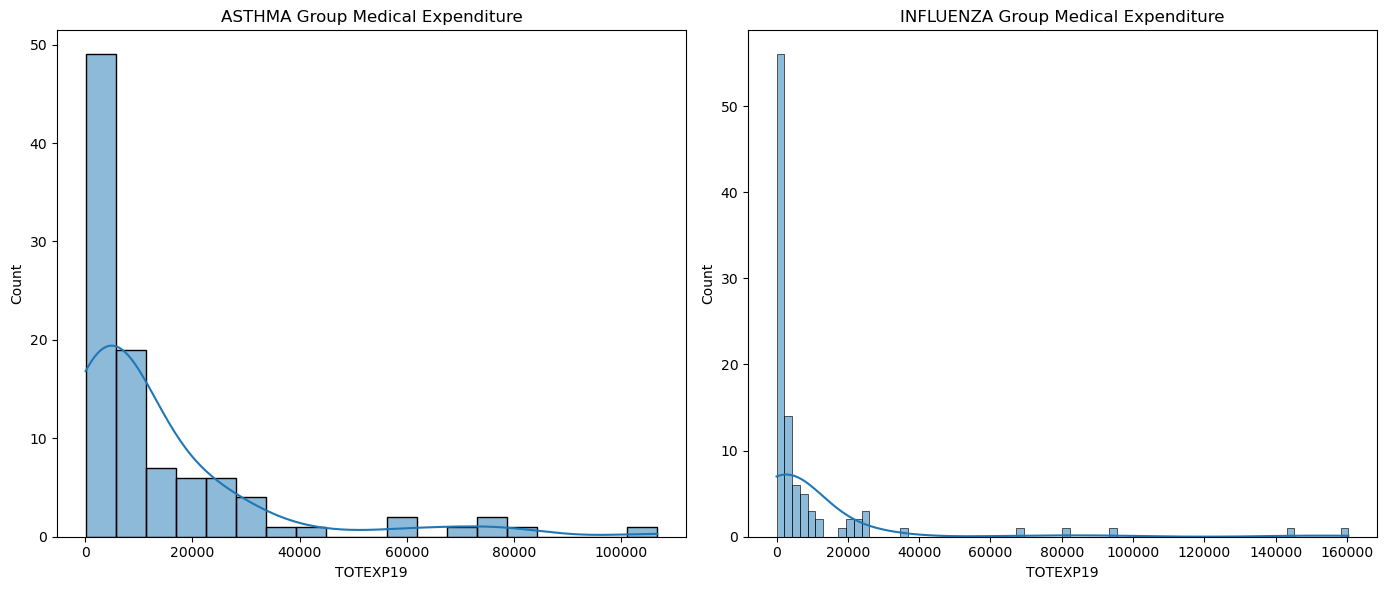

In [36]:
asthma_skew = skew(ASTHMA['TOTEXP19'])
asthma_kurtosis = kurtosis(ASTHMA['TOTEXP19'])

influenza_skew = skew(INFLUENZA['TOTEXP19'])
influenza_kurtosis = kurtosis(INFLUENZA['TOTEXP19'])

print("ASTHMA Group Skewness:", asthma_skew)
print("ASTHMA Group Kurtosis:", asthma_kurtosis)
print("INFLUENZA Group Skewness:", influenza_skew)
print("INFLUENZA Group Kurtosis:", influenza_kurtosis)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ASTHMA['TOTEXP19'], kde=True)
plt.title('ASTHMA Group Medical Expenditure')

plt.subplot(1, 2, 2)
sns.histplot(INFLUENZA['TOTEXP19'], kde=True)
plt.title('INFLUENZA Group Medical Expenditure')

plt.tight_layout()
plt.show()


### ASTHMA GROUP:

•	Skewness: 2.57 - This indicates that the distribution is favorably skewed and that the right tail is significantly longer; most medical expenses are low, but some are extremely high.

•	The distribution is thought to have heavy tails and a spiked peak, as indicated by the comparatively high kurtosis value of 6.84. There are more extreme outlier data points.

### INFLUENZA GROUP:

•	Skewness: 4.37 - This is even more positively skewed than the ASTHMA group, and it indicates that most of the expenditures are low while there are some very high outliers.

•	Kurtosis: 20.01 - The very high value of kurtosis indicates extremely heavy tails and a sharp peak, which means that there is a significant number of outliers and high variability in the expenditures.

### DETERMINING NORMALITY:

•	Shape: The two groups' histograms lack the symmetrical bell curve form of a normal distribution because they are right-skewed.

•	Skewness: An unbalanced distribution is indicated by both groups' positive skewness scores.

•	Kurtosis: Both groups have high kurtosis values, which suggest the presence of heavy tails and more extreme values than those found in a normal distribution.


              AGEDIAG  TOTEXP19  ADAPPT42  ADRISK42  Current_Age
AGEDIAG      1.000000  0.225043 -0.062444  0.122705     0.730306
TOTEXP19     0.225043  1.000000  0.061420  0.163264     0.323466
ADAPPT42    -0.062444  0.061420  1.000000 -0.338933    -0.148181
ADRISK42     0.122705  0.163264 -0.338933  1.000000     0.251366
Current_Age  0.730306  0.323466 -0.148181  0.251366     1.000000


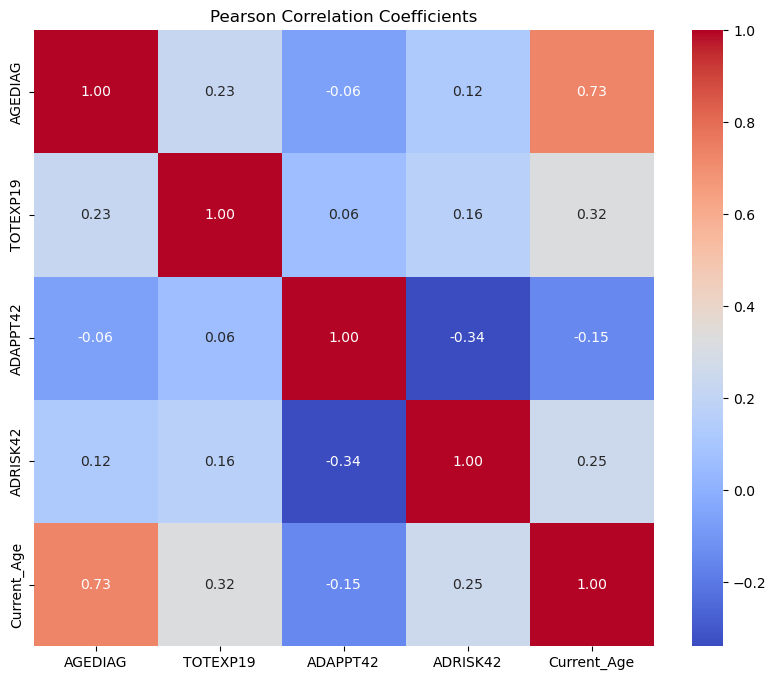

In [38]:

numerical_columns = ['AGEDIAG', 'TOTEXP19', 'ADAPPT42', 'ADRISK42', 'Current_Age']

numerical_data = sample_df[numerical_columns]

correlation_matrix = numerical_data.corr(method='pearson')

print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficients')
plt.show()


The Pearson correlation matrix indicates a number of important relationships among the numerical variables in this dataset. The correlation of 0.73 between `AGEDIAG` and `Current_Age` is strong and positive, as one might expect, because older participants would have had to be older at the time of diagnosis. The positive, moderate relations exist between TOTEXP19 and Current age 0.32 and Age at diagnosis 0.23; thus, the older the person, or the later the diagnosis of the disease, the slightly higher the costs are. In addition, a weak positive correlation, 0.16 between the risk scores, ADRISK42, and healthcare expenditures, would indicate that those people who perceive their health risks higher may have marginally higher costs.

On the other hand, medical appointments (`ADAPPT42`) are inversely related to several factors, with the most considerable negative associations observed for risk score (-0.34) and current age (-0.15), suggesting that the higher the level of risk and the older one is, the fewer the numbers of medical appointments, reflecting disparities in health care access or different healthy behaviors. The negative correlation coefficient between `ADAPPT42` and age at diagnosis is -0.06, thus meaning that appointment frequency is rather weakly but inversely related to when a condition was diagnosed. These correlations underpin the key demographic and health care expenditure trends and can hence be useful for further analysis of asthma and influenza patients in a more behavioral and characteristic way.


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df_cleaned = data[(data["TOTEXP19"] >= 0) & (data["ICD10CDX"].isin([45,11,9]))]

median_totexp19 = df_cleaned["TOTEXP19"].median()

df_cleaned["TOTEXP19_cat"] = np.where(df_cleaned["TOTEXP19"] <= median_totexp19, "Below Median", "Above Median")

contingency_table = pd.crosstab(df_cleaned["ICD10CDX"], df_cleaned["TOTEXP19_cat"])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Contingency Table (Observed):")
print(contingency_table)
print("Contingency Table (Expected):")
print(expected)

if p_val < 0.05:
    print("\nThere is a significant association between 'ICD10CDX' and 'TOTEXP19' (p < 0.05).")
else:
    print("\nThere is no significant association between 'ICD10CDX' and 'TOTEXP19' (p >= 0.05).")


Chi-square Statistic: 175.06799492799763
p-value: 9.64868042781385e-39
Degrees of Freedom: 2
Contingency Table (Observed):
TOTEXP19_cat  Above Median  Below Median
ICD10CDX                                
9                        6            18
11                     288           600
45                    1039           716
Contingency Table (Expected):
[[ 11.99550056  12.00449944]
 [443.83352081 444.16647919]
 [877.17097863 877.82902137]]

There is a significant association between 'ICD10CDX' and 'TOTEXP19' (p < 0.05).


The results show that there is a significant association between the diagnosis (`ICD10CDX`) and medical expenditures (`TOTEXP19`):
Asthma (`ICD10CDX 45`) is associated with higher expenditures, probably because of chronic management costs.
Flu influenza, ICD10CDX 11 and 9 tends to incur lower expenditure consistent with an acute often less expensive treatment.


Test: I will run Mann-Whitney U Test.

Reasoning:

Variable Types:
Categorical Variable: Anthem ( asthma and influenza) ICD10CDX.
Numerical Variable: TOTEXP19 (medical expenditure) as a sum of health care expenses among the population.
Number of Groups:
Two independent groups: asthma patient explicitly defined by ICD-10-CDX code 45 and it includes flu/ influenza patients who have codes ICD10CDX of 11 or 9.
Type of Samples:
The samples are cross-sectional as the expenditures for one category are not influenced by the others.
Data Distribution:
From previous analyses, the expenditure data is non-normal ie it has a skewed distribution. As such, the only valid test is the non-parametric test of Mann-Whitney U test.
Random Sampling:
Usability of random samples from Question 2 takes care of comparisons with less bias.
Rationale:

Mann-Whitney U Test is a highly reliable non-parametric method that is used to analyze the medians of two independent variables without respecting the null hypothesis of normality. This makes it appropriate to use for our skewed data and comes out with the right results.

In [43]:
from scipy.stats import mannwhitneyu

ASTHMA_clean = ASTHMA["TOTEXP19"].dropna()
INFLUENZA_clean = INFLUENZA["TOTEXP19"].dropna()

stat, p_value = mannwhitneyu(ASTHMA_clean, INFLUENZA_clean, alternative='two-sided')

print("Mann-Whitney U Test Statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in medical expenditures between the two groups (p < 0.05).")
else:
    print("There is no significant difference in medical expenditures between the two groups (p >= 0.05).")


Mann-Whitney U Test Statistic: 6710.0
p-value: 2.95407582306024e-05
There is a significant difference in medical expenditures between the two groups (p < 0.05).


The Mann-Whitney U Test was applied to see if there is any significant difference in medical expenditure between two groups, a group of asthma patients and influenza patients. What these test results really mean in simple terms are that the test statistic (6710.0) is a number that helps in calculating whether the differences between the two groups are simply due to chance.

The p-value 0.00002954 tells us the probability of observing this large of a difference between the groups, assuming there was no real difference. A very small p-value less than 0.05 implies that this is unlikely to be due to chance.
